# Objective
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

In [1]:
import pandas as pd 
import seaborn as sns
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
data=pd.read_csv('stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


From the above information it is clear that only some data in bmi column is missing and rest columns have 5110 numbers of attributes.

Id doesn't seems to have any impact on the output prediction thus can drop it.

In [3]:
data.drop(['id'],axis=1,inplace=True)

In [4]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


#### from the above table it is quite evident that though most of the columns are uniformly distributed but columns like ['hypertension','heart_disease','stroke'] have more than 75 percentile as 0 and very few numbers of 1.

In [5]:
data.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In categorical dtypes all data seems to be uniformly distributed

## Gender

In [6]:
data.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

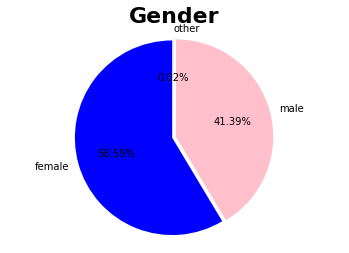

In [7]:
plt.pie(data.gender.value_counts(),explode=[.1,.3,.2],startangle=90,autopct='%.2f%%',labels=['female','male','other'],radius=10,colors=['blue','pink','red'])
plt.axis('equal')
plt.title('Gender',fontdict={'fontsize':22,'fontweight':'bold'})
plt.show()

In [8]:
data.drop(data[data.gender=='Other'].index,inplace=True,axis=0)

As there is only one row with gender as 'Other' so can drop it. By treating it as outlier

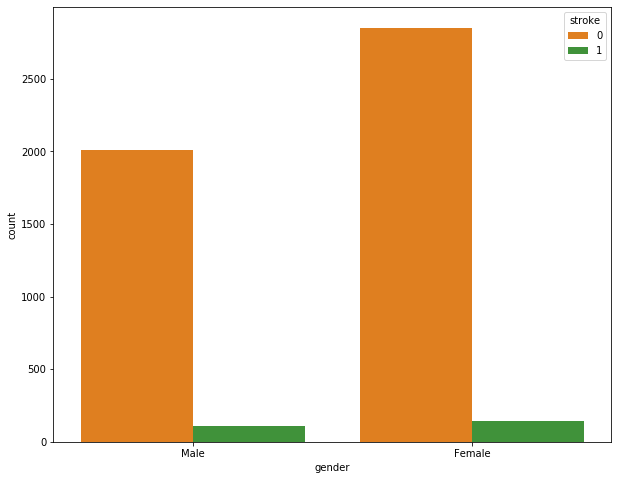

In [9]:
plt.figure(figsize=(10,8))
sns.countplot(data.gender,hue=data.stroke,palette='Paired_r')
plt.show()

From above countplot it is quite evident that females are quite less prone to strokes, though number of female data is more than that of male.

In [10]:
data.gender=pd.Categorical(data.gender,categories=['Male','Female'],ordered=True).codes

## Ever Married

In [11]:
data.ever_married.value_counts()

Yes    3353
No     1756
Name: ever_married, dtype: int64

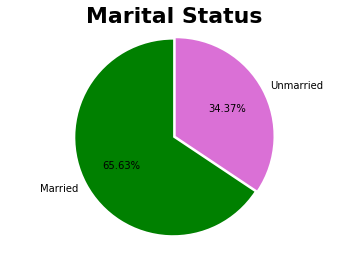

In [12]:
plt.pie(data.ever_married.value_counts(),colors=['green','orchid'],autopct='%0.2f%%',explode=[.1,.2],startangle=90,labels=['Married','Unmarried'],radius=10)
plt.title('Marital Status',fontdict={'fontsize':22,'fontweight':'bold'})
plt.axis('equal')
plt.show()

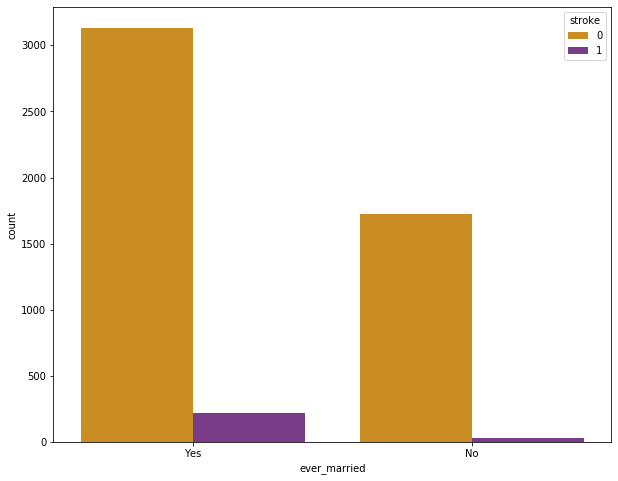

In [13]:
plt.figure(figsize=(10,8))
sns.countplot(data.ever_married,hue=data.stroke,palette='CMRmap_r')
plt.show()

In [14]:
data.ever_married=pd.Categorical(data.ever_married,categories=['No','Yes'],ordered=True).codes

## Work Type

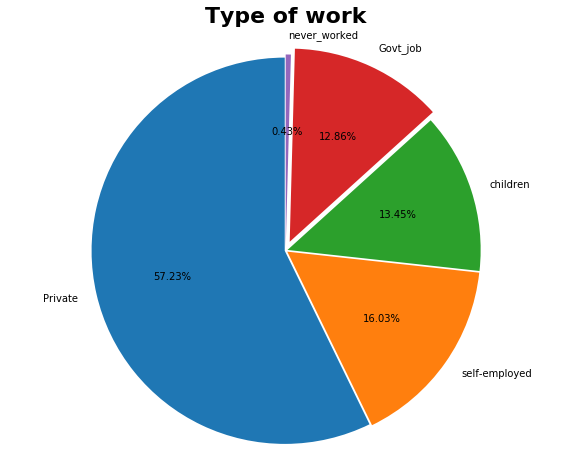

In [15]:
plt.figure(figsize=(10,8))
plt.pie(data.work_type.value_counts(),autopct='%.2f%%',explode=[.1,.2,.2,1,.3],radius=20,startangle=90,labels=['Private','self-employed','children','Govt_job','never_worked'])
plt.title('Type of work',fontdict={'fontsize':22,'fontweight':'bold'})
plt.axis('equal')
plt.show()

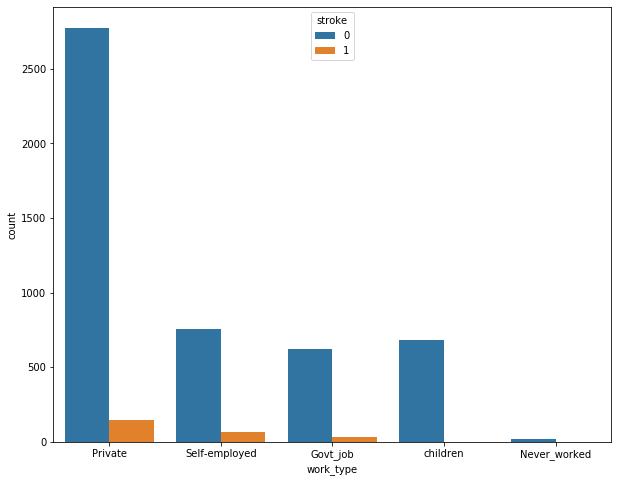

In [16]:
plt.figure(figsize=(10,8))
pt=sns.countplot(data.work_type,hue=data.stroke)
plt.show()

It is quite evident that the childrens are very less prone to stroke.

In [17]:
data.work_type=pd.Categorical(data.work_type).codes

## Recidence type

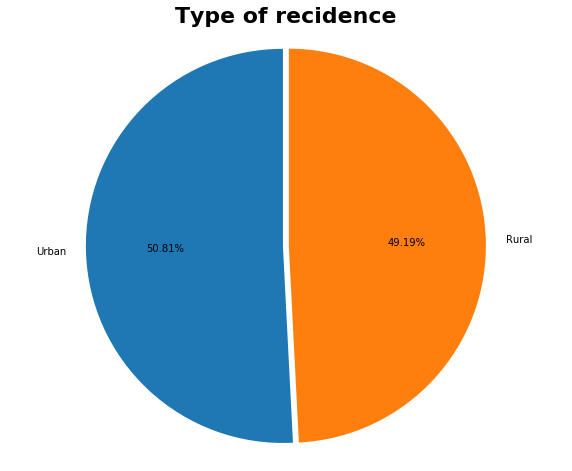

In [18]:
plt.figure(figsize=(10,8))
plt.pie(data.Residence_type.value_counts(),autopct='%.2f%%',explode=[.1,.2],radius=10,startangle=90,labels=['Urban','Rural'])
plt.title('Type of recidence',fontdict={'fontsize':22,'fontweight':'bold'})
plt.axis('equal')
plt.show()

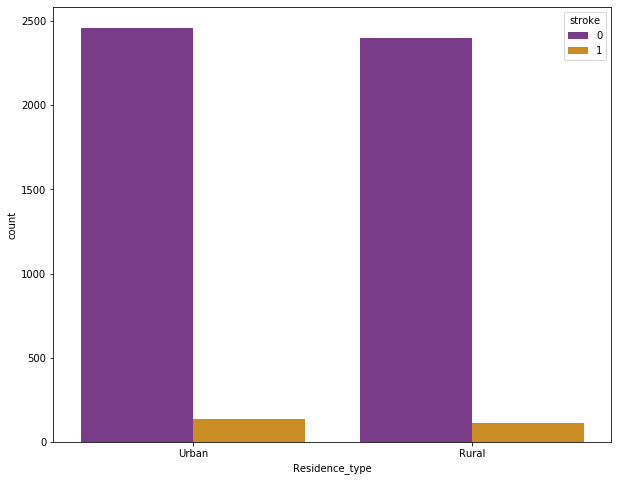

In [19]:
plt.figure(figsize=(10,8))
sns.countplot(data.Residence_type,hue=data.stroke,palette='CMRmap')
plt.show()

In [20]:
data.Residence_type=pd.Categorical(data.Residence_type,categories=['Rural','Urban'],ordered=True).codes

## Body Mass Index

In [21]:
(data.bmi.isnull().sum()/len(data.bmi))*100

3.9342337052260716

In [22]:
data.bmi.fillna(method='bfill',inplace=True)

Filling empty values in BMI with mean value of the BMI column.

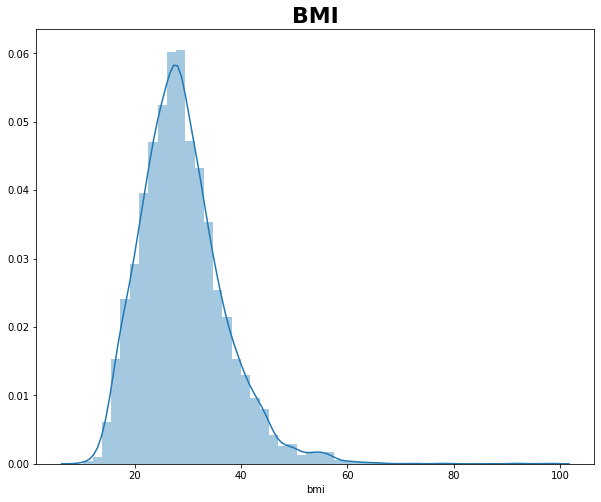

In [23]:
plt.figure(figsize=(10,8))
sns.distplot(data.bmi)
plt.title('BMI',fontdict={'fontsize':22,'fontweight':'bold'})
plt.show()

The graph of BMI distribution is quite uniform

## Smoking Status

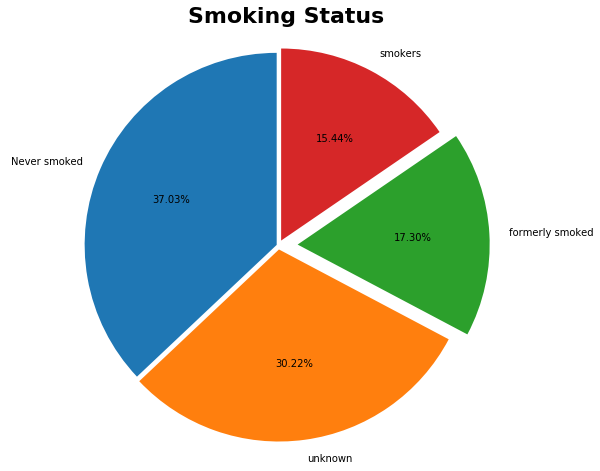

In [24]:
plt.figure(figsize=(10,8))
plt.pie(data.smoking_status.value_counts(),autopct='%.2f%%',explode=[.1,.2,1,.3],radius=10,startangle=90,labels=['Never smoked','unknown','formerly smoked','smokers'])
plt.title('Smoking Status',fontdict={'fontsize':22,'fontweight':'bold'})
plt.axis('equal')
plt.show()

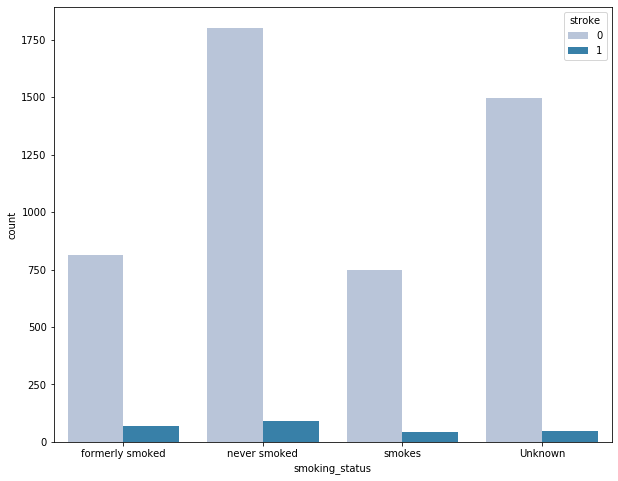

In [25]:
plt.figure(figsize=(10,8))
sns.countplot(data.smoking_status,hue=data.stroke,palette='PuBu')
plt.show()

In [26]:
data.smoking_status=pd.Categorical(data.smoking_status,categories=['never smoked','Unknown','formerly smoked','smokes'],ordered=True).codes

## Multi-Variate Analysis 

In [27]:
plt.figure(figsize=(20,10))
sns.pairplot(data)
plt.show()

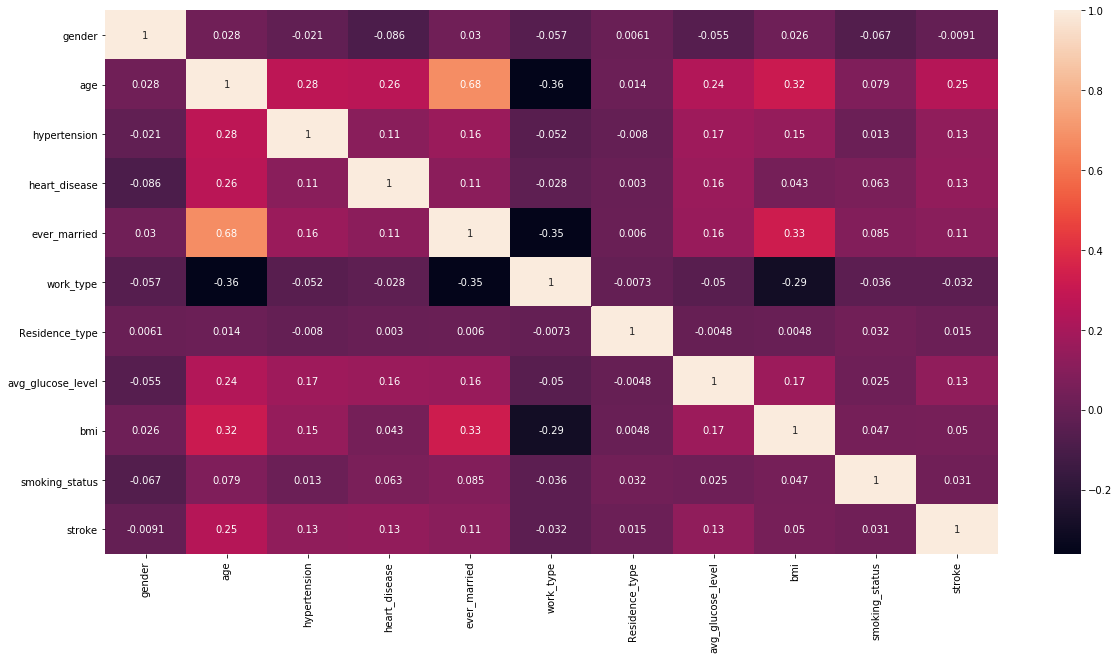

In [28]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

we can observe here that ever_married and age have high correlation i.e, 68% but as it is less then 90% it have no chane of collinearity in the feature.

In [29]:
data.skew()

gender              -0.349410
age                 -0.137430
hypertension         2.715026
heart_disease        3.946786
ever_married        -0.658345
work_type           -0.308679
Residence_type      -0.032506
avg_glucose_level    1.572815
bmi                  1.049855
smoking_status       0.530048
stroke               4.192807
dtype: float64

## spliting of data 

As we have seen earlier that [ 'hypertension' , 'heart_disease' , 'stroke'] are highly skew so we use here stratified suffule split to evenly split data. 


In [30]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(test_size=.2,random_state=42,n_splits=1)
for train_index,test_index in split.split(data,data['stroke']):
    train_data=data.iloc[train_index]
    test_data=data.iloc[test_index]

In [31]:
train_x=train_data.iloc[:,:10]
train_y=train_data.iloc[:,10]
test_x=test_data.iloc[:,:10]
test_y=test_data.iloc[:,10]

## Model Selection

In [32]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

## LogisticRegression

In [33]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression(max_iter=1000,tol=.01)
model1.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.01, verbose=0,
                   warm_start=False)

In [34]:
train_pred=model1.predict(train_x)
test_pred=model1.predict(test_x)
print('Classification Report of train_data \n',classification_report(train_y,train_pred))
print('Classification Report of test_data \n',classification_report(test_y,test_pred))

Classification Report of train_data 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      3888
           1       0.00      0.00      0.00       199

    accuracy                           0.95      4087
   macro avg       0.48      0.50      0.49      4087
weighted avg       0.90      0.95      0.93      4087

Classification Report of test_data 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       972
           1       1.00      0.02      0.04        50

    accuracy                           0.95      1022
   macro avg       0.98      0.51      0.51      1022
weighted avg       0.95      0.95      0.93      1022



C:\Users\abhij\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# DecisionTreeClassifier

In [41]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier(max_depth=8)
model2.fit(train_x,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [42]:
train_pred=model2.predict(train_x)
test_pred=model2.predict(test_x)
print('Classification Report of train_data \n',classification_report(train_y,train_pred))
print('Classification Report of test_data \n',classification_report(test_y,test_pred))

Classification Report of train_data 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      3888
           1       0.93      0.27      0.41       199

    accuracy                           0.96      4087
   macro avg       0.95      0.63      0.70      4087
weighted avg       0.96      0.96      0.95      4087

Classification Report of test_data 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.07      0.02      0.03        50

    accuracy                           0.94      1022
   macro avg       0.51      0.50      0.50      1022
weighted avg       0.91      0.94      0.92      1022



## RandomForestClassifier 

In [43]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier(max_depth=8)
model3.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
train_pred=model3.predict(train_x)
test_pred=model3.predict(test_x)
print('Classification Report of train_data \n',classification_report(train_y,train_pred))
print('Classification Report of test_data \n',classification_report(test_y,test_pred))

Classification Report of train_data 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      3888
           1       1.00      0.14      0.24       199

    accuracy                           0.96      4087
   macro avg       0.98      0.57      0.61      4087
weighted avg       0.96      0.96      0.94      4087

Classification Report of test_data 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



C:\Users\abhij\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## KNeighborsClassifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
model4=GridSearchCV(KNN,param_grid={'n_neighbors':range(3,9)})
model4.fit(train_x,train_y)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(3, 9)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [48]:
model4.best_params_

{'n_neighbors': 8}

In [49]:
train_pred=model4.predict(train_x)
test_pred=model4.predict(test_x)
print('Classification Report of train_data \n',classification_report(train_y,train_pred))
print('Classification Report of test_data \n',classification_report(test_y,test_pred))

Classification Report of train_data 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      3888
           1       0.60      0.02      0.03       199

    accuracy                           0.95      4087
   macro avg       0.78      0.51      0.50      4087
weighted avg       0.93      0.95      0.93      4087

Classification Report of test_data 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



#### Conclusion:- Though test accuracy of all models are about same i .e, 95% but LogisticRegression can be selected as an apt model because it give good precision for predicting 1 but no other model have and good responce in predicting 1. 